🏷️ PROJECT TITLE
Titanic Survival Classification – A Complete Data Science Workflow

📘 1. PROJECT DESCRIPTION
This project demonstrates a full end-to-end data science process using a cleaned version of the Titanic dataset. It includes:

Data cleaning and preprocessing

Exploratory Data Analysis (EDA)

Encoding categorical variables

Model training and evaluation (Logistic Regression & Random Forest)

Performance comparison using visualizations

The goal is to predict passenger survival based on features like age, gender, ticket class, etc.

# 🚢 Titanic Classification - Profesional

🧼 2. DATA CLEANING

In [15]:

# Load data
import pandas as pd
df = pd.read_csv("train_and_test2.csv")

# Rename the incorrectly named target column
df = df.rename(columns={"2urvived": "Survived"})

# Drop irrelevant columns
df = df.drop(columns=[col for col in df.columns if col.startswith("zero")])

# Fill missing values in 'Embarked' with the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Check for nulls
print(df.isnull().sum())



Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
Survived       0
dtype: int64


📊 3. EXPLORATORY DATA ANALYSIS

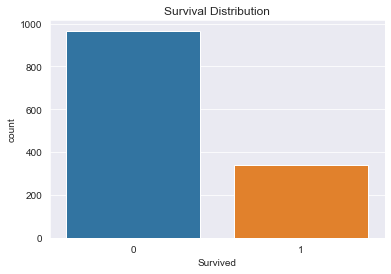

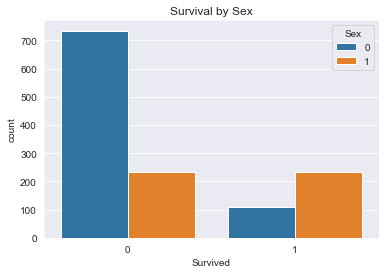

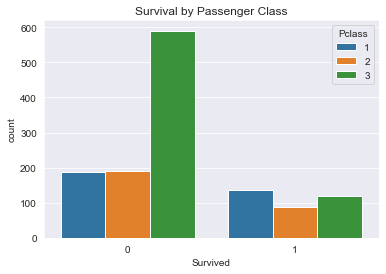

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival distribution
sns.countplot(data=df, x="Survived")
plt.title("Survival Distribution")
plt.show()

# Survival by gender
sns.countplot(data=df, x="Survived", hue="Sex")
plt.title("Survival by Sex")
plt.show()

# Survival by class
sns.countplot(data=df, x="Survived", hue="Pclass")
plt.title("Survival by Passenger Class")
plt.show()



🧪 4. DATA PREPARATION FOR MODELING

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

# Define features and target
X = df.drop(columns=["Survived", "Passengerid"])
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


🤖 5. MODEL TRAINING & EVALUATION

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    results.append((name, acc))



--- Logistic Regression ---
Accuracy: 0.7561
Confusion Matrix:
 [[217  17]
 [ 63  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.84       234
           1       0.65      0.33      0.44        94

    accuracy                           0.76       328
   macro avg       0.71      0.63      0.64       328
weighted avg       0.74      0.76      0.73       328


--- Random Forest ---
Accuracy: 0.7226
Confusion Matrix:
 [[194  40]
 [ 51  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       234
           1       0.52      0.46      0.49        94

    accuracy                           0.72       328
   macro avg       0.65      0.64      0.65       328
weighted avg       0.71      0.72      0.72       328



📈 6. MODEL COMPARISON VISUALIZATION

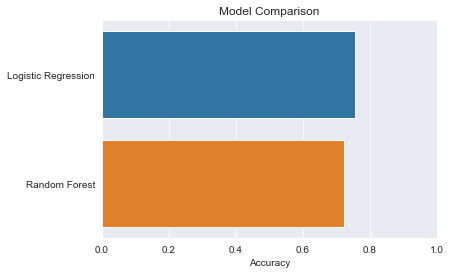

In [19]:
# Accuracy comparison bar chart
names = [r[0] for r in results]
scores = [r[1] for r in results]

sns.barplot(x=scores, y=names)
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.xlim(0, 1)
plt.show()


📌 7. CONCLUSION:
This project shows that even with minimal features, simple models like Logistic Regression and Random Forest can effectively predict survival outcomes on the Titanic dataset. With further feature engineering and hyperparameter tuning, performance could be improved.

